In [1]:
# import required python libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data from CSV FILE
covid_data=pd.read_csv("India.csv")
covid_data

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,06-03-2022,42967315.0,0.0,967279389.0,801141086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,07-03-2022,42971308.0,0.0,967460932.0,802358408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,08-03-2022,42975883.0,0.0,967725805.0,804228336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,09-03-2022,42980067.0,0.0,967946798.0,805886615.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 779 non-null    object 
 1   confirmed                            771 non-null    float64
 2   vaccines                             779 non-null    float64
 3   people_vaccinated                    408 non-null    float64
 4   people_fully_vaccinated              379 non-null    float64
 5   school_closing                       773 non-null    float64
 6   workplace_closing                    769 non-null    float64
 7   cancel_events                        769 non-null    float64
 8   gatherings_restrictions              773 non-null    float64
 9   transport_closing                    769 non-null    float64
 10  stay_home_restrictions               769 non-null    float64
 11  internal_movement_restrictions  

In [4]:
# to check the null values in data
covid_data.isnull().sum()  

date                                     0
confirmed                                8
vaccines                                 0
people_vaccinated                      371
people_fully_vaccinated                400
school_closing                           6
workplace_closing                       10
cancel_events                           10
gatherings_restrictions                  6
transport_closing                       10
stay_home_restrictions                  10
internal_movement_restrictions          10
international_movement_restrictions     10
information_campaigns                   10
contact_tracing                         10
facial_coverings                        10
dtype: int64

C:\Users\sneha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


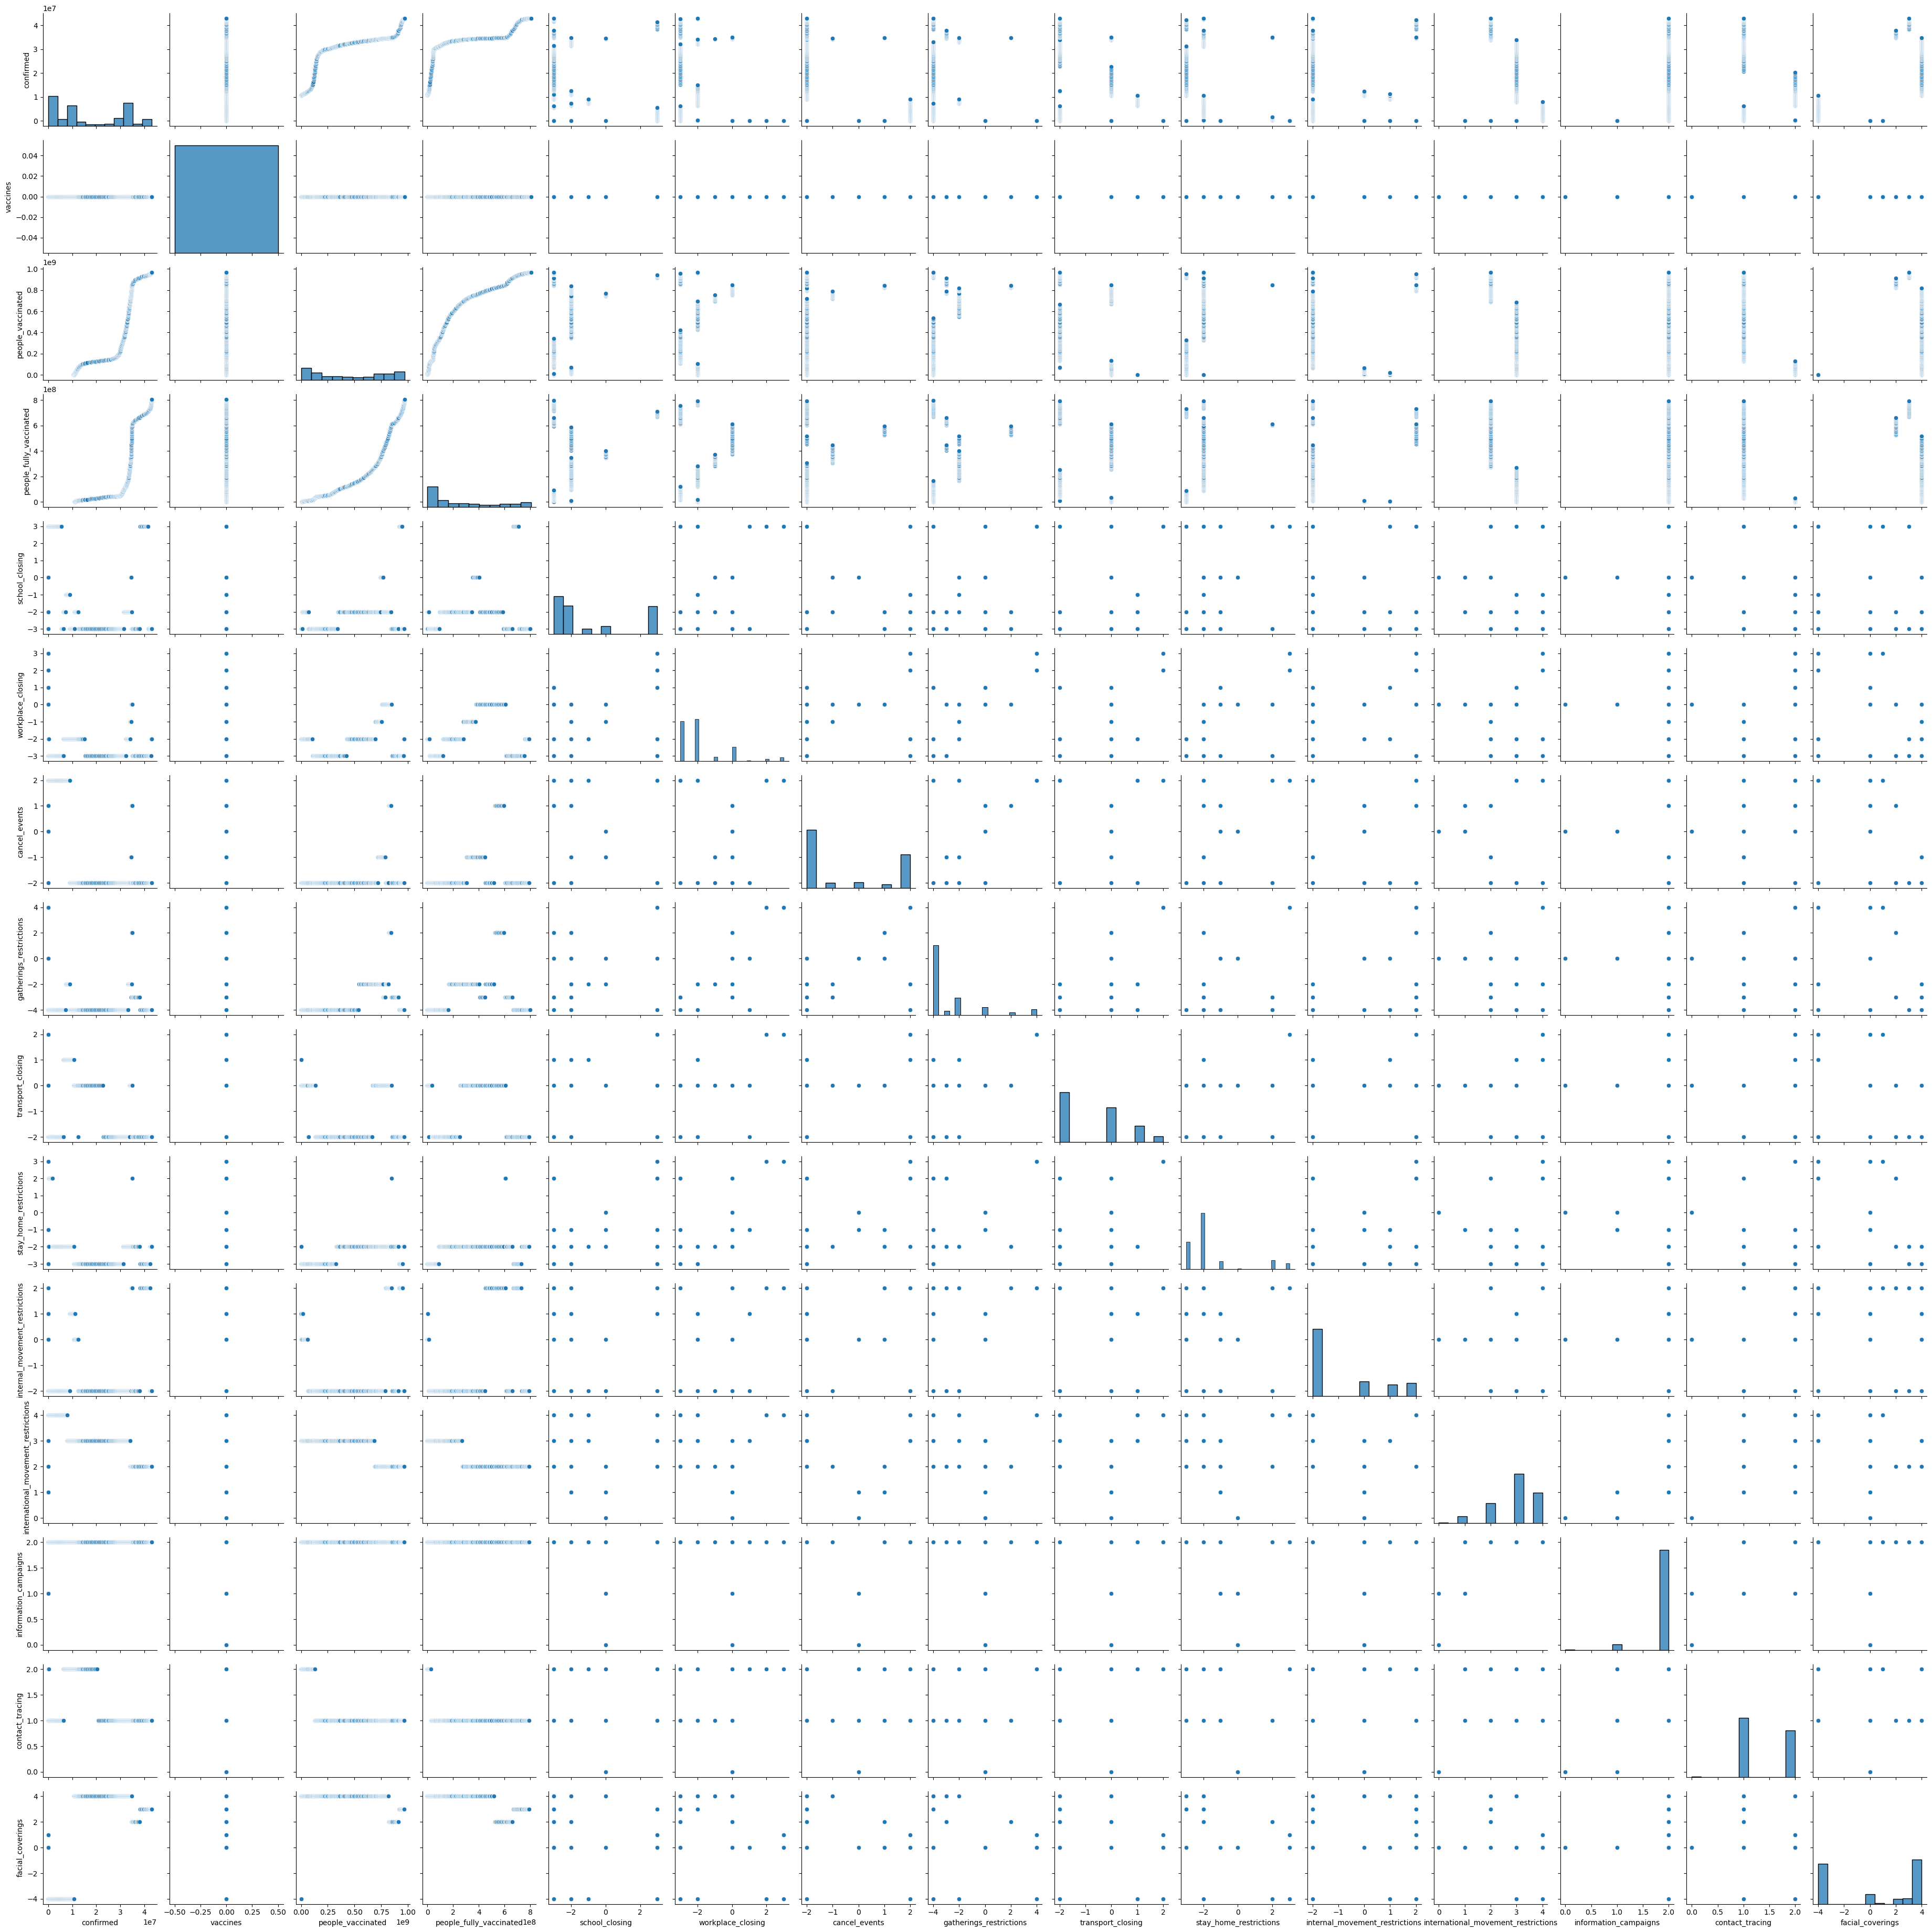

In [3]:
# to analyse data relation based on graph
# covid_data.boxplot(figsize=(20,15))
sns.pairplot(covid_data)

In [ ]:
"""
Few general analysis based on above graph:
1. As we see above, for each dates, confirmed no. of cases are varying significantly and as confirmed count increases, people are likely to take vaccinations.
2. For vaccines, we can ignore this column as it doesnot play significant role in our data relation as its constant.
3. We can observe that as dates pass by, no. of people fully vaccinated as slightly less than no. of people vaccinated atleast 1.
"""

In [34]:
# lets srub data based on NULL values
# remove rows with null values for below columns as the null values percent is below 5%
covid_data.dropna(subset=["confirmed"],inplace=True)
covid_data.dropna(subset=["school_closing"],inplace=True)
covid_data.dropna(subset=["gatherings_restrictions"],inplace=True)
covid_data.dropna(subset=["workplace_closing"],inplace=True)
covid_data.dropna(subset=["cancel_events"],inplace=True)
covid_data.dropna(subset=["transport_closing"],inplace=True)
covid_data.dropna(subset=["stay_home_restrictions"],inplace=True)
covid_data.dropna(subset=["internal_movement_restrictions"],inplace=True)
covid_data.dropna(subset=["international_movement_restrictions"],inplace=True)
covid_data.dropna(subset=["information_campaigns"],inplace=True)
covid_data.dropna(subset=["contact_tracing"],inplace=True)
covid_data.dropna(subset=["facial_coverings"],inplace=True)

# replace rows with mean values for below columns as the null values percent is below 5%
covid_data['people_vaccinated']=covid_data['people_vaccinated'].fillna(covid_data['people_vaccinated'].mean())
covid_data['people_fully_vaccinated']=covid_data['people_fully_vaccinated'].fillna(covid_data['people_vaccinated'].mean())

covid_data_cleaned=covid_data.drop("vaccines",axis=1) #remove column as it has no significance

covid_data_cleaned.isnull().sum()

date                                   0
confirmed                              0
people_vaccinated                      0
people_fully_vaccinated                0
school_closing                         0
workplace_closing                      0
cancel_events                          0
gatherings_restrictions                0
transport_closing                      0
stay_home_restrictions                 0
internal_movement_restrictions         0
international_movement_restrictions    0
information_campaigns                  0
contact_tracing                        0
facial_coverings                       0
dtype: int64

<Axes: >

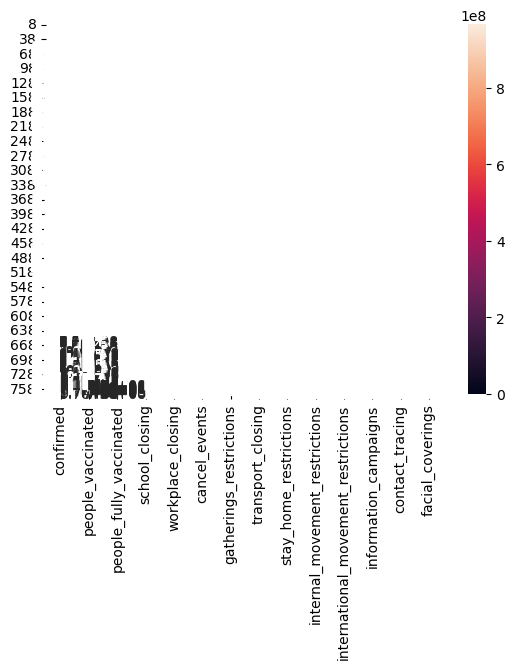

In [45]:
covid_data_cleaned_1=covid_data_cleaned.drop("date",axis=1)
sns.heatmap(covid_data_cleaned_1,linewidths=50,annot=True)

In [32]:
covid_data_cleaned.describe()

,confirmed,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
count,3.620000e+02,3.620000e+02,3.620000e+02,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,4.160756e+06,4.451979e+08,2.509775e+08,0.665746,-1.549724,0.941989,-2.348066,-0.370166,-0.640884,-0.798343,3.361878,1.903315,1.640884,-2.964088
std,5.530930e+06,1.611553e-06,7.759329e-07,2.554967,1.815297,1.630544,2.667203,1.547402,1.964586,1.536517,0.978429,0.295938,0.480405,2.037415
min,1.000000e+00,4.451979e+08,2.509775e+08,-3.000000,-3.000000,-2.000000,-4.000000,-2.000000,-3.000000,-2.000000,1.000000,1.000000,1.000000,-4.000000
25%,3.351225e+04,4.451979e+08,2.509775e+08,-2.000000,-3.000000,0.000000,-4.000000,-2.000000,-2.000000,-2.000000,3.000000,2.000000,1.000000,-4.000000
50%,1.556816e+06,4.451979e+08,2.509775e+08,3.000000,-2.000000,2.000000,-4.000000,0.000000,-2.000000,-2.000000,4.000000,2.000000,2.000000,-4.000000
75%,7.979349e+06,4.451979e+08,2.509775e+08,3.000000,0.000000,2.000000,-2.000000,1.000000,2.000000,1.000000,4.000000,2.000000,2.000000,-4.000000
max,3.222551e+07,4.451979e+08,2.509775e+08,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000


<Axes: >

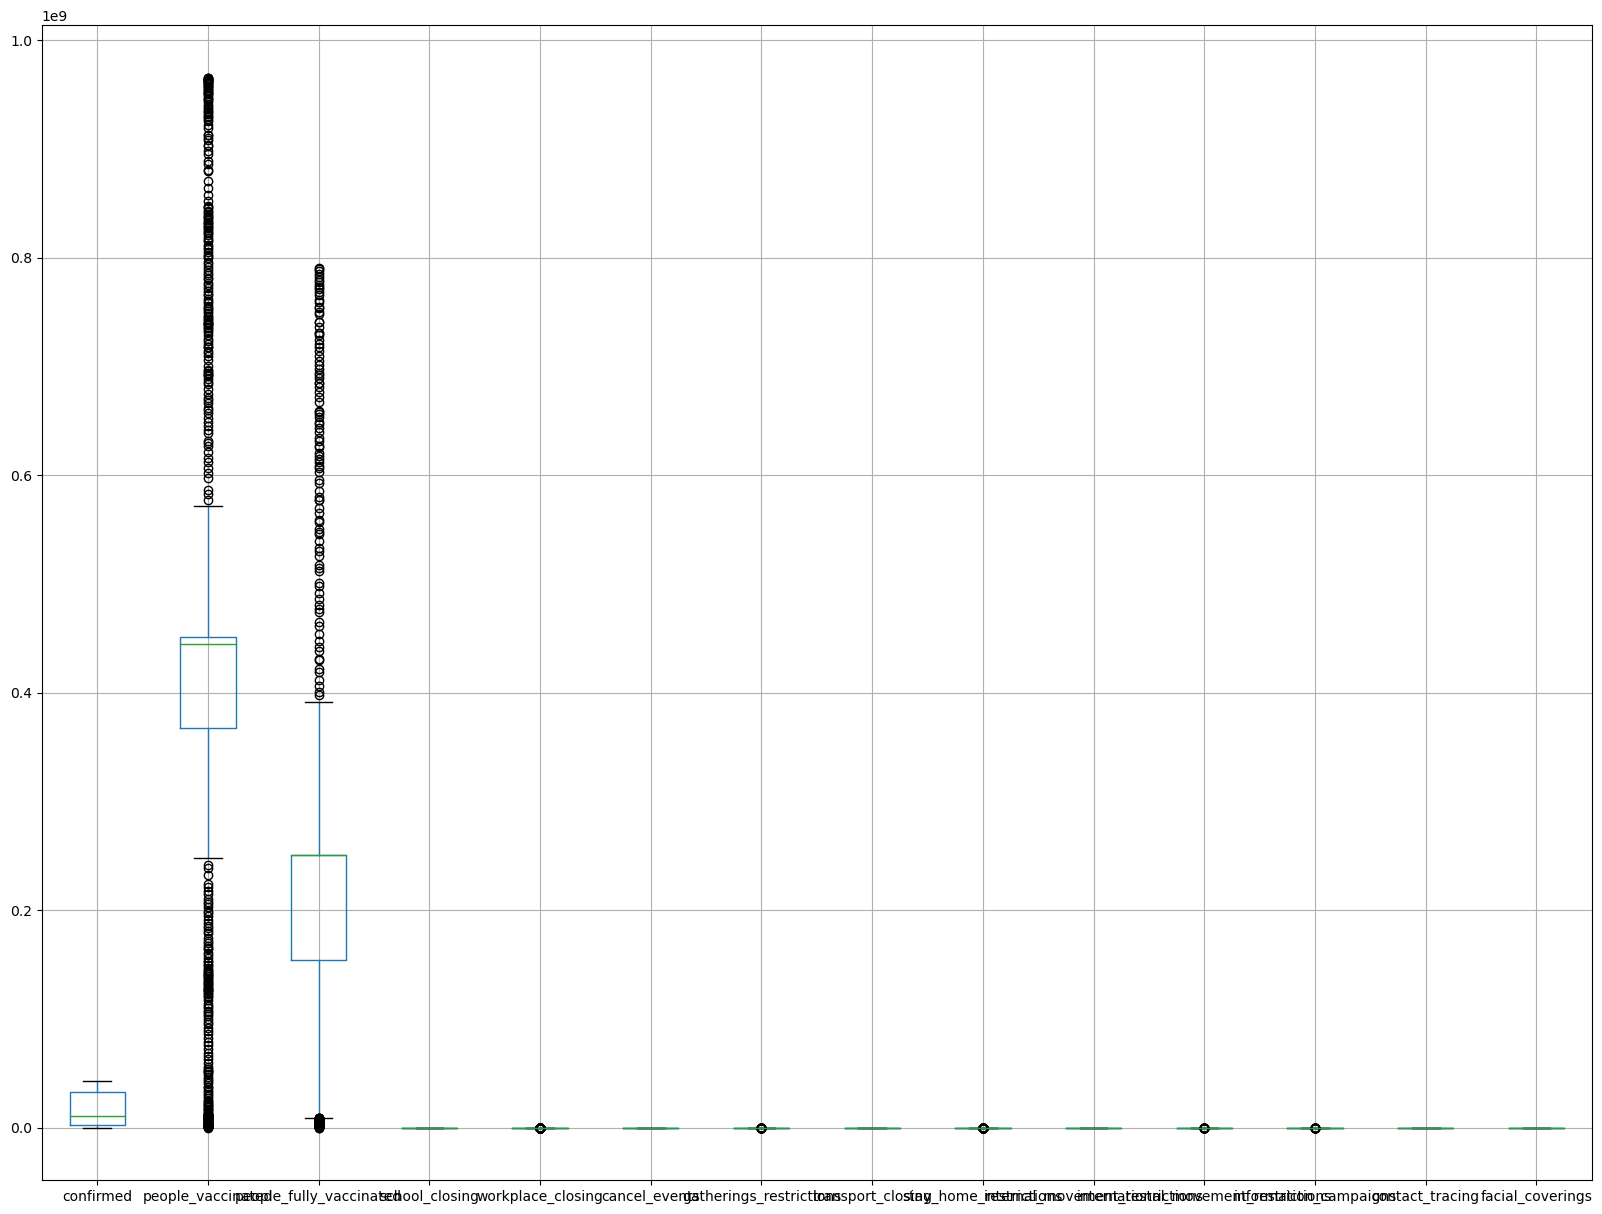

In [26]:
covid_data_cleaned.boxplot(figsize=(20,15))

array([[<Axes: title={'center': 'confirmed'}>,
        <Axes: title={'center': 'people_vaccinated'}>,
        <Axes: title={'center': 'people_fully_vaccinated'}>,
        <Axes: title={'center': 'school_closing'}>],
       [<Axes: title={'center': 'workplace_closing'}>,
        <Axes: title={'center': 'cancel_events'}>,
        <Axes: title={'center': 'gatherings_restrictions'}>,
        <Axes: title={'center': 'transport_closing'}>],
       [<Axes: title={'center': 'stay_home_restrictions'}>,
        <Axes: title={'center': 'internal_movement_restrictions'}>,
        <Axes: title={'center': 'international_movement_restrictions'}>,
        <Axes: title={'center': 'information_campaigns'}>],
       [<Axes: title={'center': 'contact_tracing'}>,
        <Axes: title={'center': 'facial_coverings'}>, <Axes: >, <Axes: >]],
      dtype=object)

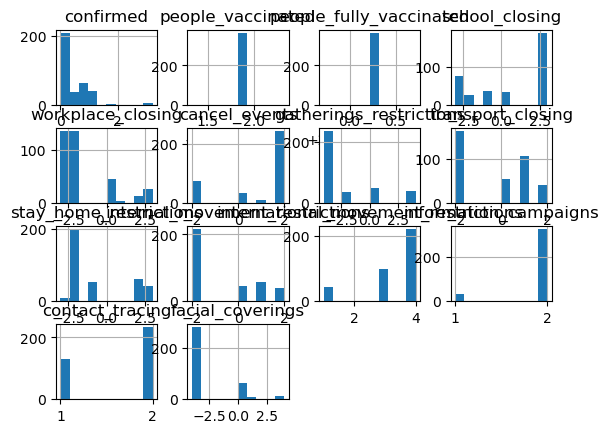

In [29]:
# As we can see above, there are lot of outliers for people vaccinated and people fully vaccinated columns which can highly impact our data.
# so lets remove them

# for people_vaccinated column, use IQR method
pv_Q1=covid_data_cleaned['people_vaccinated'].quantile(0.25)
pv_Q3=covid_data_cleaned['people_vaccinated'].quantile(0.75)
pv_IQR=pv_Q3-pv_Q1
covid_data_cleaned=covid_data_cleaned[(covid_data_cleaned['people_vaccinated']>=pv_Q1-1.5*pv_IQR)&(covid_data_cleaned['people_vaccinated']<=pv_Q3+1.5*pv_IQR)]
covid_data_cleaned.hist()

In [30]:
covid_data_cleaned.describe()

,confirmed,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
count,3.620000e+02,3.620000e+02,3.620000e+02,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,4.160756e+06,4.451979e+08,2.509775e+08,0.665746,-1.549724,0.941989,-2.348066,-0.370166,-0.640884,-0.798343,3.361878,1.903315,1.640884,-2.964088
std,5.530930e+06,1.611553e-06,7.759329e-07,2.554967,1.815297,1.630544,2.667203,1.547402,1.964586,1.536517,0.978429,0.295938,0.480405,2.037415
min,1.000000e+00,4.451979e+08,2.509775e+08,-3.000000,-3.000000,-2.000000,-4.000000,-2.000000,-3.000000,-2.000000,1.000000,1.000000,1.000000,-4.000000
25%,3.351225e+04,4.451979e+08,2.509775e+08,-2.000000,-3.000000,0.000000,-4.000000,-2.000000,-2.000000,-2.000000,3.000000,2.000000,1.000000,-4.000000
50%,1.556816e+06,4.451979e+08,2.509775e+08,3.000000,-2.000000,2.000000,-4.000000,0.000000,-2.000000,-2.000000,4.000000,2.000000,2.000000,-4.000000
75%,7.979349e+06,4.451979e+08,2.509775e+08,3.000000,0.000000,2.000000,-2.000000,1.000000,2.000000,1.000000,4.000000,2.000000,2.000000,-4.000000
max,3.222551e+07,4.451979e+08,2.509775e+08,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000


In [47]:
corr=covid_data_cleaned_1.corr()
corr.style.background_gradient(cmap='coolwarm')

,confirmed,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
confirmed,1.000000,0.457292,0.343338,-0.566300,-0.199511,-0.665555,-0.164861,-0.309506,-0.477896,-0.133910,-0.491238,0.252018,-0.602793,0.748774
people_vaccinated,0.457292,1.000000,0.869622,0.132633,0.167738,0.091215,0.239384,-0.140397,0.159223,0.043944,-0.351569,-0.000000,-0.458604,-0.016607
people_fully_vaccinated,0.343338,0.869622,1.000000,0.103918,0.144429,0.082304,0.177280,-0.054530,0.126356,0.229289,-0.358221,-0.000000,-0.275423,-0.091250
school_closing,-0.566300,0.132633,0.103918,1.000000,0.185158,0.761419,0.249987,-0.133648,0.647874,-0.000931,0.481251,-0.078104,-0.033340,-0.568739
workplace_closing,-0.199511,0.167738,0.144429,0.185158,1.000000,0.206727,0.894422,0.674987,0.481247,0.605946,-0.204361,-0.274786,0.395876,-0.036376
cancel_events,-0.665555,0.091215,0.082304,0.761419,0.206727,1.000000,0.336000,0.068446,0.603686,-0.093489,0.518387,-0.058320,0.093336,-0.751941
gatherings_restrictions,-0.164861,0.239384,0.177280,0.249987,0.894422,0.336000,1.000000,0.555116,0.536942,0.509144,-0.167060,-0.288978,0.239797,-0.073972
transport_closing,-0.309506,-0.140397,-0.054530,-0.133648,0.674987,0.068446,0.555116,1.000000,0.190116,0.603476,-0.103357,-0.113026,0.717518,-0.200752
stay_home_restrictions,-0.477896,0.159223,0.126356,0.647874,0.481247,0.603686,0.536942,0.190116,1.000000,0.205849,0.344859,-0.076228,0.025867,-0.491882
internal_movement_restrictions,-0.133910,0.043944,0.229289,-0.000931,0.605946,-0.093489,0.509144,0.603476,0.205849,1.000000,-0.221245,-0.132067,0.428373,-0.073976


In [ ]:
"""
As we can see that 
1. Confirmed cases are inversely propertional to all other aspects. Hence, we can say that proper measures except vaccinations were not taken even when the cases were coming out.
2. Places need to follow closing principal and other restrictions so to decrease the covid cases count.
"""